In [13]:
import os
import json
import pandas as pd

In [17]:
# Set your folder path
folder_path = '/Users/user/Documents/cerebrum-assignment/data/raw/CerebrumDAO_Public_Information/twitter_data'  # Update if needed

all_tweets = []

# Loop through all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json') and 'tweet' in filename.lower():
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            try:
                data = json.load(f)
                # Check if it's a dict with a "tweets" key that is a list
                if isinstance(data, dict) and "tweets" in data and isinstance(data["tweets"], list):
                    all_tweets.extend(data["tweets"])
                else:
                    print(f"Skipped {filename}: not a dict with a 'tweets' list.")
            except Exception as e:
                print(f"Error loading {filename}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_tweets)

print(f"Loaded {len(df)} tweets from {folder_path}")
df.head()

Loaded 592 tweets from /Users/user/Documents/cerebrum-assignment/data/raw/CerebrumDAO_Public_Information/twitter_data


,public_metrics,edit_history_tweet_ids,text,created_at,id,referenced_tweets,entities,attachments
0,"{'retweet_count': 1, 'reply_count': 8, 'like_c...",[1872529015665578451],gm 🧠,2024-12-27T06:24:41.000Z,1872529015665578451,NaN,NaN,NaN
1,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1872524243663208448],@rugunicorn Yes,2024-12-27T06:05:44.000Z,1872524243663208448,"[{'type': 'replied_to', 'id': '187251860694228...",NaN,NaN
2,"{'retweet_count': 35, 'reply_count': 15, 'like...",[1872334860813287578],$NEURON is Now Live on Base! 🧠\n\nFollowing th...,2024-12-26T17:33:11.000Z,1872334860813287578,NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...",{'media_keys': ['3_1872334672711016448']}
3,"{'retweet_count': 15, 'reply_count': 5, 'like_...",[1872208623931412928],It's just heartwarming seeing how much each Bi...,2024-12-26T09:11:34.000Z,1872208623931412928,"[{'type': 'quoted', 'id': '1871689823427387878'}]","{'urls': [{'start': 248, 'end': 271, 'url': 'h...",NaN
4,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",[1872207973826846911],@BitgetWallet @bioprotocol @pumpdotscience @vi...,2024-12-26T09:08:59.000Z,1872207973826846911,"[{'type': 'replied_to', 'id': '187184888547321...","{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN


In [18]:
# Show the first 5 rows
df.head()

,public_metrics,edit_history_tweet_ids,text,created_at,id,referenced_tweets,entities,attachments
0,"{'retweet_count': 1, 'reply_count': 8, 'like_c...",[1872529015665578451],gm 🧠,2024-12-27T06:24:41.000Z,1872529015665578451,NaN,NaN,NaN
1,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1872524243663208448],@rugunicorn Yes,2024-12-27T06:05:44.000Z,1872524243663208448,"[{'type': 'replied_to', 'id': '187251860694228...",NaN,NaN
2,"{'retweet_count': 35, 'reply_count': 15, 'like...",[1872334860813287578],$NEURON is Now Live on Base! 🧠\n\nFollowing th...,2024-12-26T17:33:11.000Z,1872334860813287578,NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...",{'media_keys': ['3_1872334672711016448']}
3,"{'retweet_count': 15, 'reply_count': 5, 'like_...",[1872208623931412928],It's just heartwarming seeing how much each Bi...,2024-12-26T09:11:34.000Z,1872208623931412928,"[{'type': 'quoted', 'id': '1871689823427387878'}]","{'urls': [{'start': 248, 'end': 271, 'url': 'h...",NaN
4,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",[1872207973826846911],@BitgetWallet @bioprotocol @pumpdotscience @vi...,2024-12-26T09:08:59.000Z,1872207973826846911,"[{'type': 'replied_to', 'id': '187184888547321...","{'mentions': [{'start': 0, 'end': 13, 'usernam...",NaN


In [19]:
# List all columns
df.columns.tolist()

['public_metrics',
 'edit_history_tweet_ids',
 'text',
 'created_at',
 'id',
 'referenced_tweets',
 'entities',
 'attachments']

In [21]:
# Total number of tweets
print("Total tweets:", len(df))

# Number of unique users (if 'author_id' or similar exists)
if 'author_id' in df.columns:
    print("Unique users:", df['author_id'].nunique())

Total tweets: 592


In [22]:
# Most liked tweet
if 'public_metrics' in df.columns:
    df['like_count'] = df['public_metrics'].apply(lambda x: x.get('like_count', 0) if isinstance(x, dict) else 0)
    df['retweet_count'] = df['public_metrics'].apply(lambda x: x.get('retweet_count', 0) if isinstance(x, dict) else 0)

    most_liked = df.sort_values('like_count', ascending=False).head(1)
    print("Most liked tweet:")
    print(most_liked[['text', 'like_count']])

    most_retweeted = df.sort_values('retweet_count', ascending=False).head(1)
    print("\nMost retweeted tweet:")
    print(most_retweeted[['text', 'retweet_count']])

Most liked tweet:
                                                text  like_count
2  $NEURON is Now Live on Base! 🧠\n\nFollowing th...         203

Most retweeted tweet:
                                                  text  retweet_count
126  RT @cz_binance: Learning at a small gathering ...           1593


Matplotlib is building the font cache; this may take a moment.


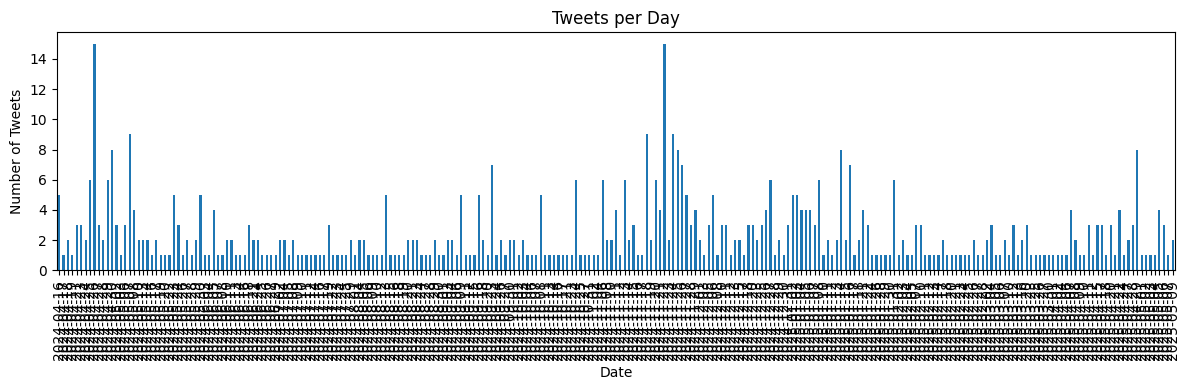

In [23]:
# Convert 'created_at' to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Group by date
tweets_per_day = df.groupby(df['created_at'].dt.date).size()

# Plot (if you have matplotlib installed)
import matplotlib.pyplot as plt

tweets_per_day.plot(kind='bar', figsize=(12, 4))
plt.title('Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [26]:
import textblob
from textblob import TextBlob
if 'text' in df.columns:
    df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
else:
    print("No 'text' column found in your DataFrame.")

In [27]:
# Show a few tweets with their sentiment scores
df[['text', 'polarity', 'subjectivity']].head()

,text,polarity,subjectivity
0,gm 🧠,0.000000,0.000000
1,@rugunicorn Yes,0.000000,0.000000
2,$NEURON is Now Live on Base! 🧠\n\nFollowing th...,-0.415909,0.650000
3,It's just heartwarming seeing how much each Bi...,0.137273,0.350909
4,@BitgetWallet @bioprotocol @pumpdotscience @vi...,0.000000,1.000000


In [28]:
print("Average polarity:", df['polarity'].mean())
print("Average subjectivity:", df['subjectivity'].mean())

Average polarity: 0.17309108618190647
Average subjectivity: 0.38629615887428387


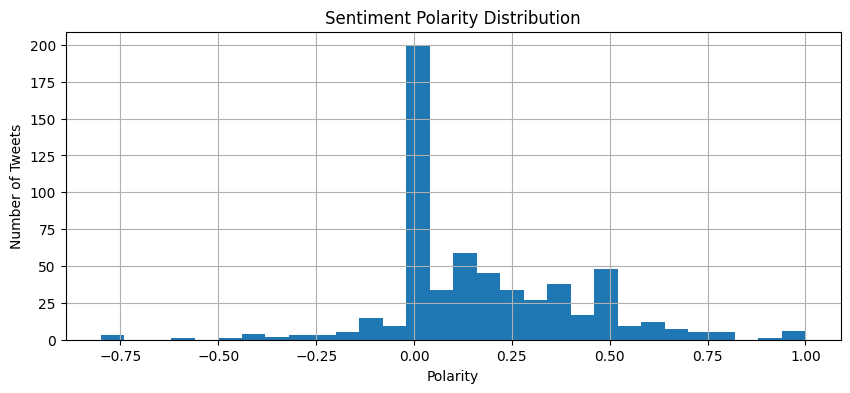

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df['polarity'].hist(bins=30)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.show()

In [30]:
print("Most positive tweet:")
print(df.loc[df['polarity'].idxmax()]['text'])

print("\nMost negative tweet:")
print(df.loc[df['polarity'].idxmin()]['text'])

Most positive tweet:
@notthreadguy It’s also the best use case for crypto 🧠

Most negative tweet:
RT @TrillionHubz: 🔥Top-tier #DeSci Projects launched on $BIO @bioprotocol rank by MarketCap 🧬

1. $VITA @vita_dao - MC: $30M
2. $HAIR @Hair…
